In [30]:
import pandas as pd
from numpy import *

In [2]:
data = pd.read_excel('C:/Users/82102/python/6. OLS VAR/NSS Fitting Resample.xlsx')
data.index = pd.to_datetime(data.set_index('Date').index)
data = data.loc[:,'1 month':]
data1 = data/10000
data1.head()

,1 month,2 month,3 month,4 month,5 month,6 month,7 month,8 month,9 month,10 month,...,111 month,112 month,113 month,114 month,115 month,116 month,117 month,118 month,119 month,120 month
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,0.064870,0.065345,0.065811,0.066268,0.066716,0.067155,0.067586,0.068008,0.068421,0.068826,...,0.082729,0.082712,0.082692,0.082671,0.082649,0.082626,0.082600,0.082574,0.082546,0.082517
2000-11-29,0.067976,0.068067,0.068158,0.068248,0.068339,0.068430,0.068521,0.068611,0.068702,0.068793,...,0.077926,0.078016,0.078106,0.078197,0.078287,0.078377,0.078467,0.078557,0.078647,0.078737
2000-12-30,0.066031,0.066089,0.066148,0.066206,0.066264,0.066322,0.066380,0.066438,0.066496,0.066554,...,0.072157,0.072210,0.072263,0.072316,0.072369,0.072422,0.072475,0.072527,0.072580,0.072633
2001-01-31,0.056196,0.056265,0.056334,0.056403,0.056472,0.056541,0.056611,0.056681,0.056751,0.056822,...,0.065037,0.065128,0.065218,0.065309,0.065400,0.065491,0.065583,0.065674,0.065766,0.065857
2001-02-28,0.055895,0.055851,0.055811,0.055776,0.055746,0.055720,0.055698,0.055680,0.055666,0.055656,...,0.065007,0.065144,0.065282,0.065420,0.065558,0.065696,0.065835,0.065974,0.066113,0.066252


In [3]:
from sklearn.preprocessing import StandardScaler

features = []
for i in range(1,121):
    features.append('%s month'%i)

x = data1.loc[:,features].values
# Standardizing the features
x_std = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x_std, columns = features)

mean_vec = mean(x_std, axis=0)
cov_mat = (x_std-mean_vec).T.dot((x_std-mean_vec)) / (x_std.shape[0]-1)
eig_vals, eig_vecs = linalg.eig(cov_mat)

from sklearn.decomposition import PCA

pca = PCA(n_components=120, svd_solver='full')
# n_components='mle'
# principalComponents1 = pca.fit_transform(x_std)  
# pca.fit(x_std).components_[0:5]
principalComponents = StandardScaler().fit_transform((x_std.dot(real(eig_vecs))))  # PCA result

k1 = []
for i in range(1,121):
    k1.append('principal component %s' %i)
principalDf = pd.DataFrame(data = principalComponents, columns = k1)

dataset = principalDf.loc[:,'principal component 1':'principal component 5']
dataset2 = principalDf.loc[:,'principal component 1':'principal component 5']
dataset.index = data.index   
dataset.head()            # X (t)   # x_std 12차원을 5차원으로 축소

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
Date,,,,,
2000-10-31,2.672691,-0.081721,-1.178719,2.337526,-0.961975
2000-11-29,2.326820,-0.874597,1.310895,0.662233,0.868272
2000-12-30,2.058844,-1.241677,0.644965,0.851330,0.498050
2001-01-31,1.471207,-0.709294,1.225385,0.308164,0.938847
2001-02-28,1.377400,-0.599881,2.422461,-0.045218,1.153449


In [4]:
daily_data = pd.read_excel('C:/Users/82102/python/6. OLS VAR/NSS Fitting rate10000 var.xlsx') 
daily_data.index = pd.to_datetime(daily_data.set_index('Date').index)
daily_data = daily_data.drop('Date',1)
daily_data = daily_data/10000
daily_data = daily_data.reindex(index = daily_data.index[::-1])

from sklearn.preprocessing import StandardScaler

x1 = daily_data.loc[:,features].values

# Standardizing the features
x_std1 = StandardScaler().fit_transform(x1)


from sklearn.decomposition import PCA

pca1 = PCA(n_components=120, svd_solver='full')

principalComponents1 = StandardScaler().fit_transform((x_std1.dot(real(eig_vecs))))  # PCA result

principalDf1 = pd.DataFrame(data = principalComponents1, columns = k1)

dataset3 = principalDf1.loc[:,'principal component 1':'principal component 5']
dataset3.index = daily_data.index   
dataset3.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
Date,,,,,
2000-10-30,2.637060,-0.101091,-0.839235,2.186034,-1.074003
2000-10-31,2.655691,-0.150784,-0.900839,2.061517,-0.815682
2000-11-02,2.598921,-0.348137,-1.036044,0.000253,1.160054
2000-11-04,2.603777,-0.378812,-1.046628,-0.181946,2.032555
2000-11-06,2.618614,-0.364123,-1.072350,-0.158861,2.022515


In [26]:
# unitroot test

from arch.unitroot import ADF 

adf = ADF(dataset.loc[:,'principal component 1'],lags =1)  
print(adf.summary().as_text())

# cointegration - johansen test

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

from statsmodels.tsa.vector_ar.vecm import coint_johansen

j = coint_johansen(dataset,1,1)
j.cvt #[:,1]
j.lr1

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.085
P-value                         0.251
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


array([277.8973595 , 166.24520344,  68.25637998,  23.31319074,
         9.3692923 ])

In [5]:
# Vector Autoregression을 linear algebra로 해보기

new = principalDf.loc[1:219,'principal component 1':'principal component 5']
old = principalDf.loc[0:218,'principal component 1':'principal component 5']
old['constant'] = 1
old = pd.DataFrame(data = old,columns=['constant','principal component 1','principal component 2','principal component 3','principal component 4','principal component 5'])

r= ((linalg.inv(old.T.dot(old))).dot(old.T)).dot(new)  # old n*6  new n*5

pd.DataFrame(data = r,columns= ['principal component1','principal component2','principal component3','principal component 4','principal component 5'])

# Vector Autoregression

import statsmodels.api as sm

model1 = sm.tsa.VAR(dataset)
result1 = model1.fit(1)
# print(result1.summary())

coef = result1.params

C:\Users\82102\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [6]:
# Vector Autoregression 의 error term 

# VAR coefficient
coef

# X (t)
old

predict = pd.DataFrame(data = array(old).dot(array(coef)), columns = coef.columns)
predict

# X (t+1)
new

# Error term = X(t+1) - coef*X(t)
Var_Error = pd.DataFrame( data = array(new) - array(predict) , columns = ['principal component 1 error','principal component 2 error','principal component 3 error','principal component 4 error','principal component 5 error'])
# V(t+1) = V

In [7]:
Maturity = []
for i in range(0,120) :
    Maturity.append((i+1)/12)

logprice1 = []
logprice = pd.DataFrame(data = logprice1,columns = data.columns[0:119])
for i in range(1,121):
    logprice['%s month' %i] = -data1['%s month' %i]*Maturity[i-1]

m2 = []
for i in range(1,221):
    m2.append(i)
logprice.index = m2

In [8]:
r = []
rt = pd.DataFrame(data = r,columns = data.columns[0:119]) 

# rt(t+1 n-1) = ln(price t+1 n-1) - ln(price t n) - ln(price t 1)
# return 값을 뽑는다.


for j in range(0,219) :
    for i in range(0,119) :
        rt.loc[j+1,'%s month' %(i+1)] = - data1.loc[data.index[j+1], data.columns[i]] * Maturity[i] + data1.loc[data.index[j], data.columns[i+1]] * Maturity[i+1] - data1.loc[data.index[j],'1 month'] * Maturity[0]       

In [778]:
m = [5 ,17, 23, 35, 47, 59 ,83 , 119]
new_rt = pd.DataFrame(data = [rt.loc[:,'%s month' %m[0]],rt.loc[:,'%s month' %m[1]],rt.loc[:,'%s month' %m[2]],rt.loc[:,'%s month' %m[3]],rt.loc[:,'%s month' %m[4]],rt.loc[:,'%s month' %m[5]],rt.loc[:,'%s month' %m[6]],rt.loc[:,'%s month' %m[7]]] )
new_rt.T

y = new_rt.T

df0 = pd.concat([Var_Error , dataset2.loc[:218,:]], axis=1) 
x = sm.add_constant(df0)
x.index = y.index

k = dot(dot(linalg.inv(dot(x.T, x)), x.T), y)
para = pd.DataFrame(data = k.T ,columns = x.columns) #index = rt.columns , columns = x.columns

In [794]:
# lambda0 와 lambda1 의 유의성 검정

sample_lambda0 = []
sample_lambda1 = []

numlist = []
for i in range(1,220):
    numlist.append(i)

import random

number_data = 150
number_lambda = 200
####################################################
for i in range(1,number_lambda+1):
    sample_index = random.choices(numlist, k = number_data)
    sample_index.sort()

    sample_y = pd.DataFrame(data = y, index = sample_index)
    sample_x = pd.DataFrame(data = x, index = sample_index)
####################################################
    
    k = dot(dot(linalg.inv(dot(sample_x.T, sample_x)), sample_x.T), sample_y)
    para = pd.DataFrame(data = k.T ,columns = x.columns) 
    
    mui = array(coef.loc['const',:]).reshape(5,1)
    pi = array(coef.loc['L1.principal component 1':,:]).T

    para_a = array(para.loc[:,'const'])
    para_b = array(para.loc[:,'principal component 1 error':'principal component 5 error'].T)
    para_c = array(para.loc[:,'principal component 1':'principal component 5'])

    #Covariance Matrix
    V = array(Var_Error)
    cov_V = V.T.dot(V) / 219

    # Vectorization
    def vec(x) :
        return x.reshape(-1,1)

    #B*  N = 8
    ii= []
    for i in range(1,26):
        ii.append(i)
    B_star = pd.DataFrame(data = [] , index = ii, columns = [1,2,3,4,5,6,7,8])
    for i in range(0,8) :
        B_star.loc[:,i+1] = vec(para_b[:,i].reshape(-1,1).dot(para_b[:,i].reshape(-1,1).T))
    B_star = B_star.T

    # Return Error
    return_error = ( array(sample_y)-array(sample_x).dot(array(para.T)) ).T

    #sigma_NT
    sigma = return_error.dot(return_error.T) / (8*number_data)
    #sigma_2 = sum (return_error.dot(return_error.T)[i,i] for i in range(0,8)) / (8*number_data)
    sigma1 = []
    for i in range(0,8):
        sigma1.append(sigma[i,i])
    sigma_in = array(sigma1)

    # lambda0 / lambda1
    new_lambda0 = linalg.inv(para_b.dot(para_b.T)).dot(para_b).dot( para_a.reshape(8,1) + 0.5*(array(B_star.dot(vec(cov_V))) + sigma_in.reshape(8,1)) )
    new_lambda1 = linalg.inv(para_b.dot(para_b.T)).dot(para_b).dot(para_c)

    sample_lambda0.append(new_lambda0)
    sample_lambda1.append(new_lambda1)
    

    
########## beta = 0 를 검정하는 t-value
mean_sample_lambda0 = sum (sample_lambda0[i] for i in range(0,number_lambda))/ number_lambda
std_sample_lambda0 = sqrt( sum ( (sample_lambda0[i]-mean_sample_lambda0)**2 for i in range(0,number_lambda) ) / ( number_lambda-1 ) )

lambda0_tstatistics = mean_sample_lambda0 / std_sample_lambda0 #* sqrt(number_lambda)
lambda0_tstatistics = pd.DataFrame(data = lambda0_tstatistics)


mean_sample_lambda1 = sum (sample_lambda1[i] for i in range(0,number_lambda))/ number_lambda
std_sample_lambda1 = sqrt( sum ( (sample_lambda1[i]-mean_sample_lambda1)**2 for i in range(0,number_lambda) ) / ( number_lambda-1 ) )

lambda1_tstatistics = mean_sample_lambda1 / std_sample_lambda1 #* sqrt(number_lambda)
lambda1_tstatistics = pd.DataFrame(data = lambda1_tstatistics)

tstatistics_index = ['PC1','PC2','PC3','PC4','PC5']
tstatistics_columns = ['lambda0','lambda1_1','lambda1_2','lambda1_3','lambda1_4','lambda1_5']

tstatistics_table = pd.concat([lambda0_tstatistics.T, lambda1_tstatistics.T ] ).T
tstatistics_table.index = tstatistics_index
tstatistics_table.columns = tstatistics_columns
tstatistics_table

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


,lambda0,lambda1_1,lambda1_2,lambda1_3,lambda1_4,lambda1_5
PC1,-839.497734,-919.017648,-396.589960,-96.451887,-31.167925,94.596396
PC2,86.846963,-34.473037,-178.544258,-138.163784,-88.509784,5.119129
PC3,-14.885699,0.983480,-36.725165,-159.191187,1.584957,30.970762
PC4,-6.180998,-17.615148,-11.801571,-0.359357,-51.911355,11.676708
PC5,-1.232900,-0.329708,1.116669,2.449736,2.999851,-12.459405


In [32]:
import pandas as pd
import statsmodels.api as sm

dfx = pd.DataFrame(data = data1['2 month'])
dfy = pd.DataFrame(data = data1['118 month'])
index10 = []
for i in range(1,221):
    index10.append(i)
dfx.index = index10
dfy.index = index10



model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())

NameError: name 'data1' is not defined

In [364]:
from random import *

numlist2 = []
for i in range(1,221):
    numlist2.append(i)

numlist3 = []
for i in range(1,221):
    numlist3.append(2*i+ 1+ 6*random()+4*random()+randrange(1000)+i**65)
    
import pandas as pd
import statsmodels.api as sm

index10 = []
for i in range(1,221):
    index10.append(i)
    

dfx = numlist2
dfx = pd.DataFrame(data = dfx)
dfy = numlist3
dfy = pd.DataFrame(data = dfy)
dfx.index = index10
dfy.index = index10


model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     21.17
Date:                Wed, 27 Feb 2019   Prob (F-statistic):           7.10e-06
Time:                        11:49:27   Log-Likelihood:                -76926.
No. Observations:                 220   AIC:                         1.539e+05
Df Residuals:                     219   BIC:                         1.539e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          4.242e+148  9.22e+147      4.602      0.0

In [370]:
result.tvalues

0    4.601524
dtype: float64

In [369]:
sample_lambda0 = []

numlist = []
for i in range(1,221):
    numlist.append(i)

import random

number_data = 150
number_lambda = 600
####################################################
for i in range(1,number_lambda+1):
    sample_index = random.choices(numlist, k = number_data)
    sample_index.sort()

    sample_y = pd.DataFrame(data = dfy, index = sample_index)
    sample_x = pd.DataFrame(data = dfx, index = sample_index)
####################################################

    k = dot(dot(linalg.inv(dot(sample_x.T, sample_x)), sample_x.T), sample_y)
    para = pd.DataFrame(data = k ) 
    
    sample_lambda0.append(para)

########## beta = 0 를 검정하는 t-value
mean_sample_lambda0 = sum (sample_lambda0[i] for i in range(0,number_lambda))/ number_lambda
std_sample_lambda0 = sqrt( sum ( (sample_lambda0[i]-mean_sample_lambda0)**2 for i in range(0,number_lambda) ) / ( number_lambda-1 ) )

lambda0_tstatistics = mean_sample_lambda0 / std_sample_lambda0  #* sqrt(number_lambda)
lambda0_tstatistics = pd.DataFrame(data = lambda0_tstatistics)
tstatistics_table = pd.concat([lambda0_tstatistics.T ]).T
tstatistics_table

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


,0
0,2.267865


In [142]:
# t_value를 p_value로 변환

from scipy import stats

pd.DataFrame(data = stats.t.sf(np.abs(tstatistics_table),number_lambda-1 )*2)

NameError: name 'np' is not defined

In [279]:
#OLS 코딩 / y는 한 개의 row씩 해야지 결과값이 나온다.

model = sm.OLS(y['5 month'],x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                5 month   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.937e+05
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:15:38   Log-Likelihood:                 2246.9
No. Observations:                 219   AIC:                            -4472.
Df Residuals:                     208   BIC:                            -4434.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [373]:
mui = array(coef.loc['const',:]).reshape(5,1)
pi = array(coef.loc['L1.principal component 1':,:]).T

para_a = array(para.loc[:,'const'])
para_b = array(para.loc[:,'principal component 1 error':'principal component 5 error'].T)
para_c = array(para.loc[:,'principal component 1':'principal component 5'])



#Covariance Matrix
V = array(Var_Error)
cov_V = V.T.dot(V) / 219

# Vectorization
def vec(x) :
    return x.reshape(-1,1)

#B*  N = 8
ii= []
for i in range(1,26):
    ii.append(i)
B_star = pd.DataFrame(data = [] , index = ii, columns = [1,2,3,4,5,6,7,8])
for i in range(0,8) :
    B_star.loc[:,i+1] = vec(para_b[:,i].reshape(-1,1).dot(para_b[:,i].reshape(-1,1).T))
B_star = B_star.T

# Return Error

return_error = ( array(y)-array(x).dot(array(para.T)) ).T

#sigma_NT

sigma = return_error.dot(return_error.T) / (8*219)
sigma_2 = sum (return_error.dot(return_error.T)[i,i] for i in range(0,8)) / (8*219)
sigma1 = []
for i in range(0,8):
    sigma1.append(sigma[i,i])
sigma_in = array(sigma1)

NameError: name 'coef' is not defined

In [210]:
# lambda0 / lambda1
lambda0 = linalg.inv(para_b.dot(para_b.T)).dot(para_b).dot( para_a.reshape(8,1) + 0.5*(array(B_star.dot(vec(cov_V))) + sigma_in.reshape(8,1)) )
lambda1 = linalg.inv(para_b.dot(para_b.T)).dot(para_b).dot(para_c)

In [431]:
# delta0 / delta1 

dfy0 = pd.DataFrame(data = logprice['1 month'])
dfy = dfy0['1 month'].astype('float')

index1 = []
for i in range(1,221):
    index1.append(i)
dfx = pd.DataFrame(data = sm.add_constant(dataset))
dfx.index = index1

model = sm.OLS(dfy,dfx)
result = model.fit()
# print(result.summary())

delta_0 = -result.params[0]*dfx['const']
delta0 = -result.params[0]
delta_1 = -result.params[1:6]  
delta1 = array(delta_1).reshape(5,1)  # B 5*1 matrix

In [15]:
#dfx.T.loc['principal component 1': ,:]   # X(t)

In [432]:
# B0,B1 ~ B8 / A

N = 120 
B = zeros((5,N+1))
A = zeros(N+1)

for i in range(0,N):
    B[:,i+1] = B[:,i].dot(pi - lambda1)-delta1.T
    A[i+1] = A[i] + (B[:,i]).dot(mui - lambda0) + 0.5*(B[:,i].dot(cov_V).dot(B[:,i].reshape(5,1)) + sigma_2 ) - delta0

In [433]:
Maturity  # 1, 5, 10 년

fitted_logprice = A[1:N+1].reshape(N,1) + B[:,1:N+1].T.dot(dfx.T.loc['principal component 1': ,:])
# pd.DataFrame(data = fitted_logprice) 

M1 = [] 
for i in range(1,121):
    M1.append('%s month' %i)

fitted_yield = pd.DataFrame(data = [])

for i in range(0,N):
    fitted_yield[i] = - fitted_logprice[i] / Maturity[i]
fitted_yield.columns = M1

In [434]:
# daily data

daily_logprice = pd.DataFrame(data = [] , columns = data.columns[0:119])
for i in range(1,121):
    daily_logprice['%s month' %i] = -daily_data['%s month' %i]*Maturity[i-1]
a = []
for i in range(1,4561):
    a.append(i)
daily_logprice.index = a



dfx1 = pd.DataFrame(data = sm.add_constant(dataset3))
a = []
for i in range(1,4561):
    a.append(i)
dfx1.index = a


# 일별 피팅 로그프라이스
daily_fitted_logprice = A[1:N+1].reshape(N,1) + B[:,1:N+1].T.dot(dfx1.T.loc['principal component 1': ,:])

M1 = [] 
for i in range(1,121):
    M1.append('%s month' %i)

daily_fitted_yield = pd.DataFrame(data = [])

for i in range(0,N):
    daily_fitted_yield[i] = - daily_fitted_logprice[i] / Maturity[i]
daily_fitted_yield.columns = M1
daily_fitted_yield.index = daily_data.index

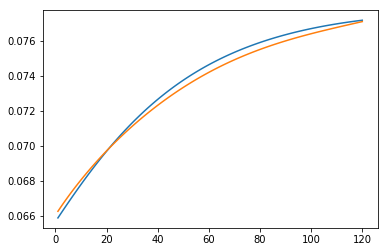

In [435]:
plt.plot(a1 , daily_data.loc['2000-11-18',:])
plt.plot(a1 , daily_fitted_yield.loc['2000-11-18',:])

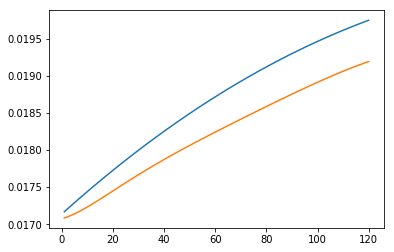

In [436]:
a1 = []
for i in range(1,121):
    a1.append(i)

plt.plot(a1 , daily_data.loc['2019-01-15',:])
plt.plot(a1 , daily_fitted_yield.loc['2019-01-15',:])

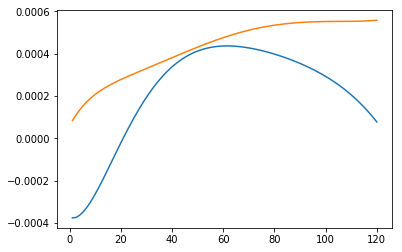

In [437]:
plt.plot(a1 , daily_data.loc['2000-11-18',:]-daily_fitted_yield.loc['2000-11-18',:])
plt.plot(a1 , daily_data.loc['2019-01-15',:]-daily_fitted_yield.loc['2019-01-15',:])

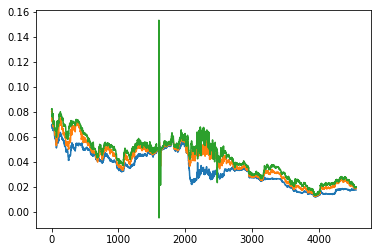

In [16]:
import matplotlib.pyplot as plt

a = []
for i in range(1,4561):
    a.append(i)

plt.plot(a , daily_data.loc[:,'12 month'])
plt.plot(a , daily_data.loc[:,'60 month'])
plt.plot(a , daily_data.loc[:,'120 month'])

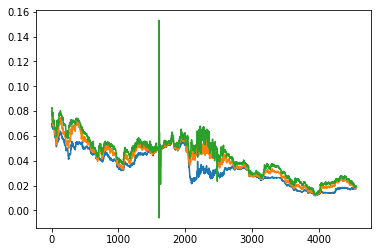

In [23]:
plt.plot(a , daily_fitted_yield['12 month'])
plt.plot(a , daily_fitted_yield['60 month'])
plt.plot(a , daily_fitted_yield['120 month'])

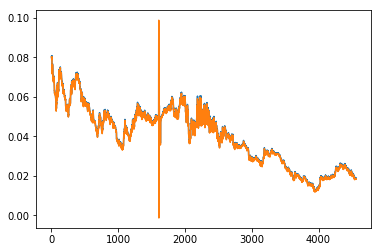

In [24]:
plt.plot(a , daily_data.loc[:,'60 month'])
plt.plot(a , daily_fitted_yield['60 month'])

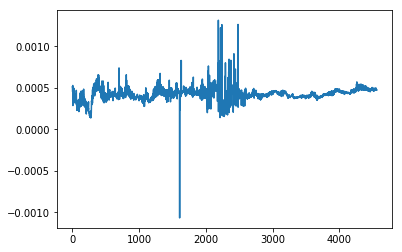

In [438]:
plt.plot(a , daily_data.loc[:,'60 month']-daily_fitted_yield['60 month'])

In [ ]:
# future yield 

In [26]:
future_dataset = zeros((120,6))
future_dataset[0,1:] = array(sm.add_constant(dataset).loc['2019-01-16',:]).dot(coef)
future_dataset[:,0] = 1

for i in range(1,120):
    y = future_dataset[i-1,:]
    future_dataset[i,1:] = y.dot(coef)

pd.DataFrame(data = future_dataset[:,1:].T)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-1.359960,-1.332157,-1.306703,-1.283066,-1.260902,-1.239983,-1.220152,-1.201291,-1.183311,-1.166137,...,-0.672952,-0.672138,-0.671345,-0.670575,-0.669826,-0.669098,-0.668390,-0.667701,-0.667032,-0.666381
1,-0.326392,-0.231651,-0.155160,-0.091473,-0.037536,0.008606,0.048301,0.082541,0.112100,0.137605,...,0.189671,0.189363,0.189063,0.188771,0.188487,0.188211,0.187943,0.187682,0.187428,0.187182
2,-0.187008,-0.098831,-0.058303,-0.043205,-0.040992,-0.044875,-0.051309,-0.058491,-0.065532,-0.072029,...,-0.069990,-0.069866,-0.069746,-0.069629,-0.069516,-0.069405,-0.069298,-0.069193,-0.069092,-0.068993
3,0.113112,0.120599,0.115939,0.109142,0.102171,0.095590,0.089543,0.084057,0.079110,0.074664,...,0.025259,0.025224,0.025189,0.025156,0.025123,0.025091,0.025061,0.025031,0.025002,0.024973
4,-0.075231,-0.028958,-0.009353,-0.000547,0.003415,0.004984,0.005372,0.005192,0.004760,0.004236,...,0.000913,0.000917,0.000922,0.000926,0.000930,0.000934,0.000938,0.000942,0.000946,0.000949


In [27]:
future_fitted_logprice = A[1:N+1].reshape(N,1) + B[:,1:N+1].T.dot( future_dataset[:,1:].T )
pd.DataFrame(data = future_fitted_logprice)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.001427,-0.001420,-0.001413,-0.001407,-0.001402,-0.001400,-0.001399,-0.001400,-0.001403,-0.001406,...,-0.001878,-0.001879,-0.001880,-0.001881,-0.001882,-0.001883,-0.001884,-0.001884,-0.001885,-0.001886
1,-0.002858,-0.002846,-0.002833,-0.002824,-0.002817,-0.002815,-0.002815,-0.002819,-0.002826,-0.002835,...,-0.003792,-0.003794,-0.003796,-0.003798,-0.003800,-0.003802,-0.003803,-0.003805,-0.003807,-0.003808
2,-0.004294,-0.004277,-0.004262,-0.004251,-0.004245,-0.004245,-0.004249,-0.004257,-0.004269,-0.004285,...,-0.005741,-0.005744,-0.005747,-0.005750,-0.005753,-0.005756,-0.005758,-0.005761,-0.005763,-0.005766
3,-0.005735,-0.005715,-0.005700,-0.005690,-0.005687,-0.005690,-0.005699,-0.005714,-0.005733,-0.005757,...,-0.007724,-0.007728,-0.007732,-0.007736,-0.007739,-0.007743,-0.007746,-0.007750,-0.007753,-0.007756
4,-0.007181,-0.007161,-0.007147,-0.007140,-0.007141,-0.007150,-0.007166,-0.007189,-0.007217,-0.007250,...,-0.009738,-0.009743,-0.009748,-0.009753,-0.009758,-0.009762,-0.009767,-0.009771,-0.009775,-0.009779
5,-0.008632,-0.008613,-0.008602,-0.008601,-0.008609,-0.008626,-0.008650,-0.008682,-0.008720,-0.008763,...,-0.011784,-0.011790,-0.011796,-0.011801,-0.011807,-0.011812,-0.011818,-0.011823,-0.011828,-0.011832
6,-0.010090,-0.010073,-0.010068,-0.010074,-0.010090,-0.010116,-0.010151,-0.010194,-0.010243,-0.010298,...,-0.013859,-0.013866,-0.013873,-0.013879,-0.013886,-0.013892,-0.013898,-0.013904,-0.013910,-0.013916
7,-0.011554,-0.011541,-0.011543,-0.011558,-0.011585,-0.011622,-0.011668,-0.011723,-0.011785,-0.011852,...,-0.015962,-0.015970,-0.015978,-0.015986,-0.015993,-0.016000,-0.016007,-0.016014,-0.016021,-0.016027
8,-0.013024,-0.013017,-0.013028,-0.013054,-0.013093,-0.013143,-0.013202,-0.013270,-0.013345,-0.013426,...,-0.018093,-0.018102,-0.018111,-0.018120,-0.018128,-0.018136,-0.018144,-0.018152,-0.018159,-0.018167
9,-0.014501,-0.014501,-0.014523,-0.014562,-0.014614,-0.014678,-0.014752,-0.014835,-0.014924,-0.015020,...,-0.020251,-0.020261,-0.020271,-0.020280,-0.020290,-0.020299,-0.020307,-0.020316,-0.020324,-0.020332


In [28]:
future_fitted_yield = pd.DataFrame(data = [])

for i in range(0,N):
    future_fitted_yield[i] = - future_fitted_logprice[i] / Maturity[i]
future_fitted_yield.columns = M1
future_fitted_yield.head()

,1 month,2 month,3 month,4 month,5 month,6 month,7 month,8 month,9 month,10 month,...,111 month,112 month,113 month,114 month,115 month,116 month,117 month,118 month,119 month,120 month
0,0.017127,0.017150,0.017176,0.017204,0.017234,0.017265,0.017297,0.017331,0.017366,0.017401,...,0.020735,0.020758,0.020780,0.020803,0.020825,0.020847,0.020869,0.020891,0.020912,0.020933
1,0.017041,0.017074,0.017109,0.017146,0.017185,0.017226,0.017268,0.017311,0.017356,0.017401,...,0.021496,0.021525,0.021553,0.021580,0.021608,0.021635,0.021663,0.021689,0.021716,0.021742
2,0.016953,0.017000,0.017049,0.017100,0.017152,0.017205,0.017259,0.017315,0.017371,0.017428,...,0.022131,0.022163,0.022194,0.022225,0.022256,0.022287,0.022317,0.022348,0.022377,0.022407
3,0.016880,0.016942,0.017006,0.017070,0.017136,0.017202,0.017269,0.017337,0.017405,0.017474,...,0.022681,0.022715,0.022748,0.022782,0.022815,0.022848,0.022880,0.022912,0.022944,0.022976
4,0.016828,0.016904,0.016982,0.017060,0.017139,0.017218,0.017297,0.017377,0.017457,0.017537,...,0.023171,0.023206,0.023241,0.023276,0.023310,0.023344,0.023378,0.023412,0.023445,0.023478


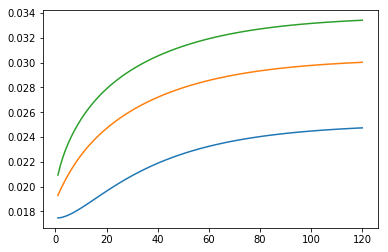

In [29]:
b = []
for i in range(1,121):
    b.append(i)

y4 = future_fitted_yield['12 month']
y5 = future_fitted_yield['60 month']
y6 = future_fitted_yield['120 month']

plt.plot(b,y4)
plt.plot(b,y5)
plt.plot(b,y6)

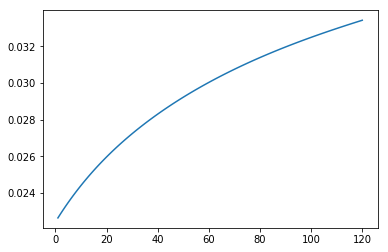

In [30]:
y7 = future_fitted_yield.loc[119,:]
plt.plot(b,y7)